<a href="https://colab.research.google.com/github/TaliNatan/DSPS_TNatan/blob/main/HW2_TNatan/MBoltzmannDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/tali/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['mean', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1) label the axes in the plot

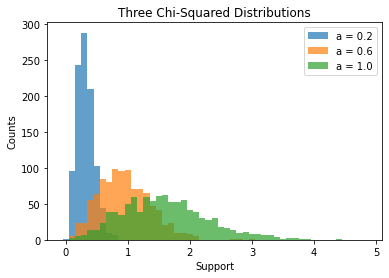

In [6]:
np.random.randn(123)
fig, ax = plt.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1)-0.05, alpha=0.7,
       label="a = %.1f"%a);
plt.xlabel('Support')
plt.ylabel('Counts')
plt.legend();
plt.title('Three Chi-Squared Distributions')
plt.show()

## Figure 1.
The above figure shows the histogram of three specific Chi-Squared distributions, the Maxwell-Boltzmann Distribution, with three different a values (0.2 (blue), 0.6 (orange), and 1.0 (green)).

# 2) knowing that the scale parameter a is a function of the temperature T, and that the dependency is to a power 1/2, which is correct:

From [wikipedia](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution), we have the distribution parameter a $\alpha$ $\sqrt{T}$.

# 3) What is the mean of all three distributions. How does it compare to the most probable molecular speed?

From [wikipedia](https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution), the mean $\mu = 2 a \sqrt{2 / \pi}$. For our three distributions, the mean would be $\mu = 0.318$, $0.957$, and $1.596$ for $a = 0.2$, $0.6$, and $1.0$ respectively from this equation. By inspection of the above plot, these values make sense.

The mean of a [chi distribution] (https://en.wikipedia.org/wiki/Chi_distribution) is $\mu = \sqrt{2} \frac{\Gamma(\frac{1}{2}(k+1))}{\Gamma(\frac{k}{2})}$ where k is the number of the degrees of freedom.

In [7]:
def mean(k): # this function takes in the number of degrees of freedom k and outputs the mean of the Maxwell-Boltzmann distribution
  return np.sqrt(2)*sp.special.gamma((1/2)*(k+1))/sp.special.gamma(k/2)

a0_2, a0_6, a1_0  = mean(3)*0.2, mean(3)*0.6, mean(3)*1.0 # to get the actual mean, you must multiply the value by a

print(a0_2, a0_6, a1_0)

0.31915382432114625 0.9574614729634385 1.595769121605731


These values are similar to those calculated from the specific Maxwell–Boltzmann distribution $\mu$ value. To check against the actual mean of the distribution of the above plots, we can just use `np.mean` to find those means.

In [8]:
a0_2_from_dist = np.mean(sp.stats.chi.rvs(df=3, scale=0.2, size=1000))
a0_6_from_dist = np.mean(sp.stats.chi.rvs(df=3, scale=0.6, size=1000))
a1_0_from_dist = np.mean(sp.stats.chi.rvs(df=3, scale=1.0, size=1000))

print(a0_2_from_dist, a0_6_from_dist, a1_0_from_dist)

0.321954862099706 0.9438204025937792 1.599959153992273
